In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from baseline import *
from cvmodeling import *
from utils import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, make_scorer, auc
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate, train_test_split

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Age,Gender,City,Education_Level,Income_sum,Joining Designation,Grade,Total Business Value,Quarterly Rating_last,employee_cost_per_day,Quarterly_rating_change,Income_change,Joining_month,is_churn
0,-0.946682,-0.834188,0.112195,1.216049,-0.569151,-0.975022,-1.164953,-0.314641,0.706497,-0.065228,0.062537,-0.135616,1.477363,1
1,-0.445188,-0.834188,1.445459,1.216049,-0.630350,0.213676,-0.102619,-0.502646,-0.528576,0.275116,0.062537,-0.135616,1.159143,0
2,1.560790,-0.834188,-1.221068,1.216049,-0.318997,0.213676,-0.102619,-0.464290,-0.528576,0.225173,0.062537,-0.135616,1.477363,1
3,-0.779518,-0.834188,1.687870,-1.234575,-0.622209,-0.975022,-1.164953,-0.489456,-0.528576,-0.454699,0.062537,-0.135616,-2.023054,1
4,-0.445188,1.198771,-1.463479,-0.009263,-0.213665,1.402374,0.959714,-0.364019,0.706497,0.689080,1.133767,-0.135616,-0.113736,0


In [ ]:
X = data.iloc[:, :-1]
y = data['is_churn'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1785, 13) (596, 13)
(1785,) (596,)


============================================================ LogisticRegression() ============================================================
----->    finished training the model
======================================== Train accuracy: 0.8 ========================================
======================================== Test accuracy: 0.81 ========================================
======================================== Train F1 Score: 0.863 ========================================
======================================== Test F1 Score: 0.871 ========================================
======================================== Confusion matrix:  ============================================================ 
 [[103  88]
 [ 25 380]]
======================================== Precision Score: 0.812 ========================================
======================================== Recall Score: 0.938 ========================================
======================================== ROC AUC Score:

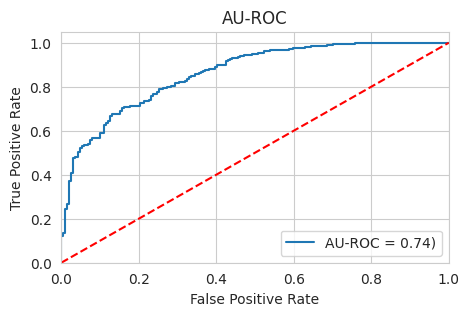

======================================== Classification report:  ======================================== 
               precision    recall  f1-score   support

           0       0.80      0.54      0.65       191
           1       0.81      0.94      0.87       405

    accuracy                           0.81       596
   macro avg       0.81      0.74      0.76       596
weighted avg       0.81      0.81      0.80       596

Area under P-R Curve:  0.9252605551587957


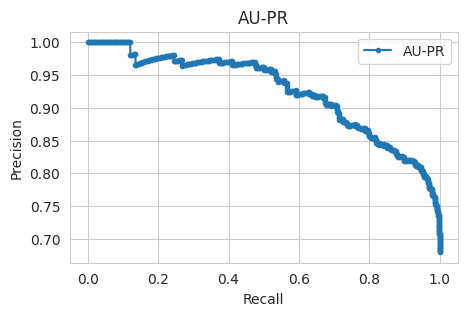

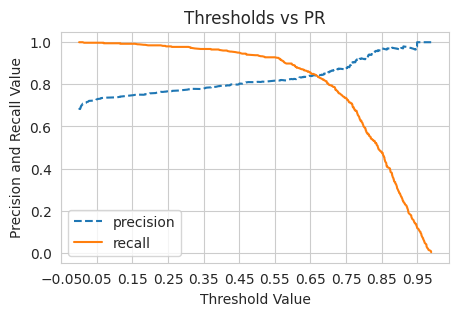

----->    Optimal threshold:  0.6670519408852242
======================================== metrics logged ========================================
============================================================ DecisionTreeClassifier() ============================================================
----->    finished training the model
======================================== Train accuracy: 1.0 ========================================
======================================== Test accuracy: 0.773 ========================================
======================================== Train F1 Score: 1.0 ========================================
======================================== Test F1 Score: 0.834 ========================================
======================================== Confusion matrix:  ============================================================ 
 [[121  70]
 [ 65 340]]
======================================== Precision Score: 0.829 ========================================
========

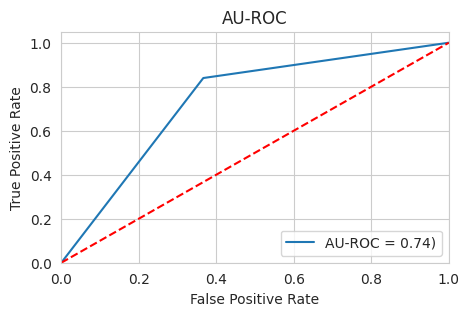

======================================== Classification report:  ======================================== 
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       191
           1       0.83      0.84      0.83       405

    accuracy                           0.77       596
   macro avg       0.74      0.74      0.74       596
weighted avg       0.77      0.77      0.77       596

Area under P-R Curve:  0.8889174341034983


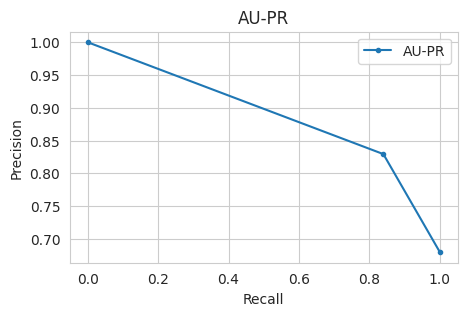

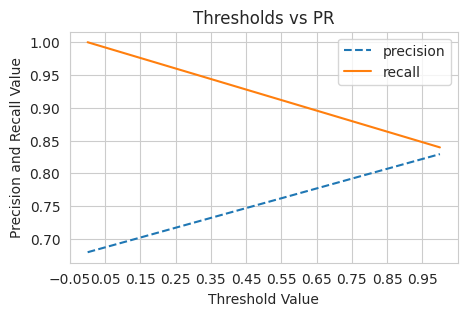

----->    Optimal threshold:  1.0
======================================== metrics logged ========================================
============================================================ RandomForestClassifier() ============================================================
----->    finished training the model
======================================== Train accuracy: 1.0 ========================================
======================================== Test accuracy: 0.847 ========================================
======================================== Train F1 Score: 1.0 ========================================
======================================== Test F1 Score: 0.891 ========================================
======================================== Confusion matrix:  ============================================================ 
 [[132  59]
 [ 32 373]]
======================================== Precision Score: 0.863 ========================================
=======================

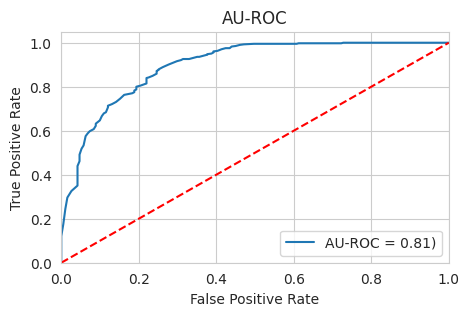

======================================== Classification report:  ======================================== 
               precision    recall  f1-score   support

           0       0.80      0.69      0.74       191
           1       0.86      0.92      0.89       405

    accuracy                           0.85       596
   macro avg       0.83      0.81      0.82       596
weighted avg       0.84      0.85      0.84       596

Area under P-R Curve:  0.9402961032132183


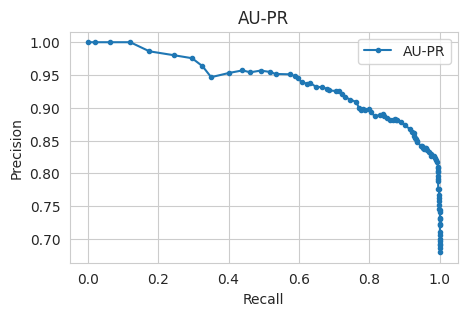

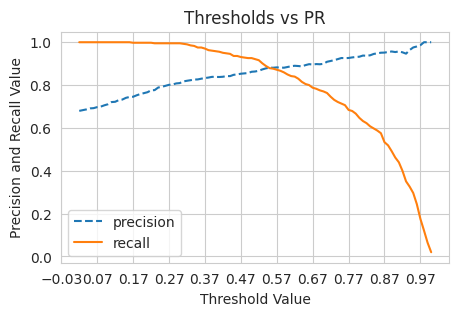

----->    Optimal threshold:  0.55
======================================== metrics logged ========================================
============================================================ GradientBoostingClassifier() ============================================================
----->    finished training the model
======================================== Train accuracy: 0.891 ========================================
======================================== Test accuracy: 0.846 ========================================
======================================== Train F1 Score: 0.922 ========================================
======================================== Test F1 Score: 0.889 ========================================
======================================== Confusion matrix:  ============================================================ 
 [[134  57]
 [ 35 370]]
======================================== Precision Score: 0.867 ========================================
==============

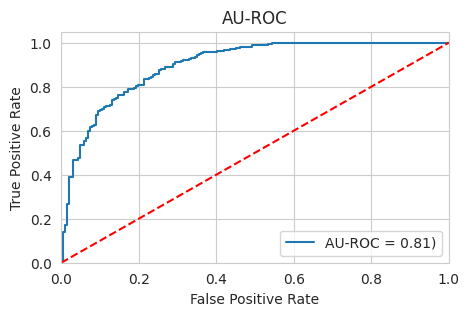

======================================== Classification report:  ======================================== 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       191
           1       0.87      0.91      0.89       405

    accuracy                           0.85       596
   macro avg       0.83      0.81      0.82       596
weighted avg       0.84      0.85      0.84       596

Area under P-R Curve:  0.9343538911879697


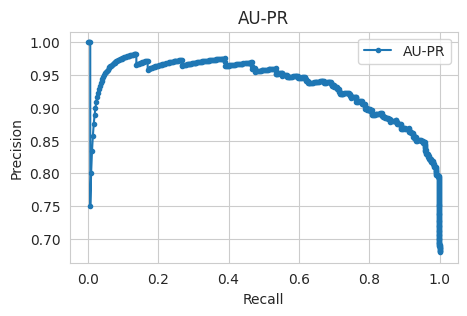

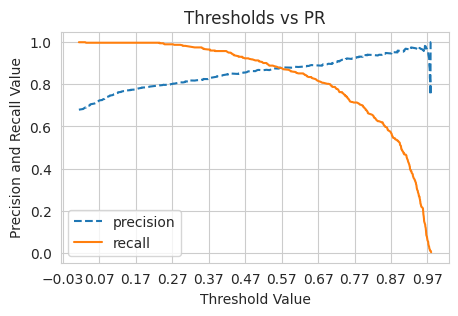

----->    Optimal threshold:  0.5646197501541829
======================================== metrics logged ========================================
============================================================ XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) =========================================

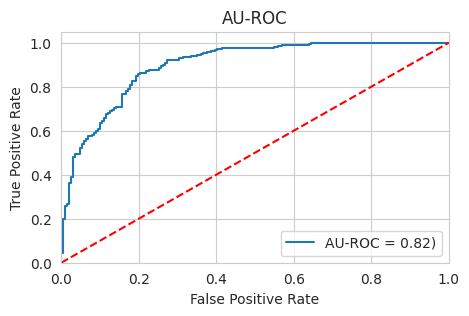

======================================== Classification report:  ======================================== 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       191
           1       0.88      0.90      0.89       405

    accuracy                           0.85       596
   macro avg       0.82      0.82      0.82       596
weighted avg       0.84      0.85      0.84       596

Area under P-R Curve:  0.9387956797284563


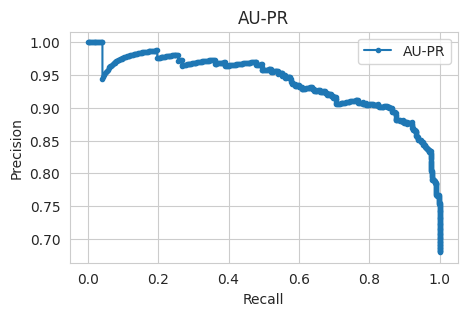

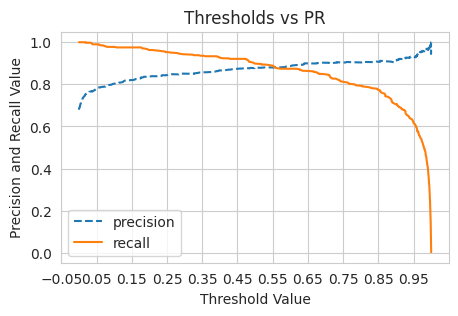

----->    Optimal threshold:  0.55616564
======================================== metrics logged ========================================


In [ ]:
results = []
for model in [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]:
    modelx = BaselineModeling(model, X_train, y_train, X_test, y_test)
    modelx.fit()
    modelx.evaluate()
    resultsx = modelx.results
    results.append(resultsx)
    print("=="*50)

In [ ]:
metrics_df = consolidate_metrics(results)
metrics_df

,Model name,Train accuracy,Test accuracy,Train F1 Score,Test F1 Score,Precision,Recall,Confusion matrix,Classification report,ROC AUC Score,PR AUC Score,Optimal threshold
0,LogisticRegression,0.800,0.810,0.863,0.871,0.812,0.938,"[[103, 88], [25, 380]]",precision recall f1-score ...,0.739,0.925261,0.667052
0,DecisionTreeClassifier,1.000,0.773,1.000,0.834,0.829,0.840,"[[121, 70], [65, 340]]",precision recall f1-score ...,0.737,0.888917,1.000000
0,RandomForestClassifier,1.000,0.847,1.000,0.891,0.863,0.921,"[[132, 59], [32, 373]]",precision recall f1-score ...,0.806,0.940296,0.550000
0,GradientBoostingClassifier,0.891,0.846,0.922,0.889,0.867,0.914,"[[134, 57], [35, 370]]",precision recall f1-score ...,0.808,0.934354,0.564620
0,XGBClassifier,1.000,0.846,1.000,0.888,0.879,0.896,"[[141, 50], [42, 363]]",precision recall f1-score ...,0.817,0.938796,0.556166


In [ ]:
cv_model = CVModeling(
                      LogisticRegression(),
                      X_train, 
                      y_train, 
                      X_test,
                      y_test,
                      scoring='f1',
                      cv_type='stratifiedkfold',
                      param_grid=None
                     )
cv_model.perform_cv()

============================================================ LogisticRegression() ============================================================
======================================== Stratified K-Fold CV Train score: 0.8642171484102746 ========================================
======================================== Stratified K-Fold CV Test score: 0.8618487695325197 ========================================


(0.8642171484102746, 0.8618487695325197)

In [ ]:
param_grid_logistic_regression = {
    'penalty': ['l1', 'l2'],           # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10],    # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],
}
cv_model = CVModeling(
                      LogisticRegression(),
                      X_train, 
                      y_train, 
                      X_test,
                      y_test,
                      scoring='pr_auc',
                      cv_type='gridsearchcv',
                      param_grid=param_grid_logistic_regression
                     )
cv_model.perform_cv()

============================================================ LogisticRegression() ============================================================
======================================== Grid Search CV best cv results:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'} 0.9269077091489141 ========================================
======================================== Grid Search CV best estimator:  LogisticRegression(C=10, penalty='l1', solver='saga') ========================================
======================================== Grid Search CV best params:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'} ========================================
======================================== Grid Search CV best score:  0.9269077091489141 ========================================


{'mean_fit_time': array([0.00385356, 0.00413713, 0.00505981, 0.01009207, 0.00626001,
        0.0108314 , 0.00761662, 0.01099706, 0.00619373, 0.01564913,
        0.00603752, 0.01578941, 0.0083849 , 0.02501049, 0.00970182,
        0.02550473, 0.00927858, 0.0255877 , 0.00810819, 0.02593236]),
 'std_fit_time': array([0.00063682, 0.00044845, 0.00063871, 0.000919  , 0.00067034,
        0.00131467, 0.00383798, 0.00210996, 0.00106665, 0.00230846,
        0.00030487, 0.0017238 , 0.00118587, 0.00335656, 0.00255536,
        0.00293404, 0.00127879, 0.00284099, 0.00069042, 0.00344952]),
 'mean_score_time': array([0.00331154, 0.00284286, 0.00320759, 0.0028574 , 0.00346355,
        0.00271392, 0.00336909, 0.00259342, 0.00281262, 0.00250788,
        0.00278082, 0.0026546 , 0.00270324, 0.00265007, 0.00288692,
        0.00286131, 0.00293393, 0.00267606, 0.00236411, 0.0032639 ]),
 'std_score_time': array([0.00079909, 0.00029922, 0.00053889, 0.00060462, 0.00034806,
        0.00035975, 0.00074047, 0.000252